In [1]:
import datetime
import socket

# Get local time
local_time = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# Get computer ID or hostname
computer_id = socket.gethostname()

# Print output with local time and computer ID
print('Final Project: Solutions by Nkem Mbachu') # Please change your name here
print('Local Time:', local_time)
print('Computer ID:', computer_id)

Final Project: Solutions by Nkem Mbachu
Local Time: 2023-07-30 12:34:21
Computer ID: Nkem


In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sb

# ETL

In [3]:
df_raw=pd.read_csv(r'C:\Users\mbach\Downloads\Data Science files\rm-yields-data.csv')

In [4]:
df_raw.head()

,Year,RM,Winter Wheat,Canola,Spring Wheat,Mustard,Durum,Sunflowers,Oats,Lentils,Peas,Barley,Fall Rye,Canary Seed,Spring Rye,Tame Hay,Flax,Chickpeas
0,1938,1,NaN,NaN,4.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN
1,1939,1,NaN,NaN,9.0,NaN,NaN,NaN,16.0,NaN,NaN,16.0,NaN,NaN,NaN,NaN,0.0,NaN
2,1940,1,NaN,NaN,12.0,NaN,NaN,NaN,23.0,NaN,NaN,19.0,NaN,NaN,NaN,NaN,8.0,NaN
3,1941,1,NaN,NaN,18.0,NaN,NaN,NaN,32.0,NaN,NaN,28.0,NaN,NaN,NaN,NaN,5.0,NaN
4,1942,1,NaN,NaN,20.0,NaN,NaN,NaN,35.0,NaN,NaN,28.0,14.0,NaN,NaN,NaN,5.0,NaN


In [5]:
df=df_raw.loc[df_raw['RM'] == 247][['Year', 'Spring Wheat']]

In [6]:
df.head()

,Year,Spring Wheat
12579,1938,10.0
12580,1939,18.0
12581,1940,10.0
12582,1941,12.0
12583,1942,24.0


In [7]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.year

In [8]:
df=df.set_index('Year')
df.head()

,Spring Wheat
Year,
1938,10.0
1939,18.0
1940,10.0
1941,12.0
1942,24.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 1938 to 2022
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Spring Wheat  85 non-null     float64
dtypes: float64(1)
memory usage: 1.3 KB


<Axes: xlabel='Year'>

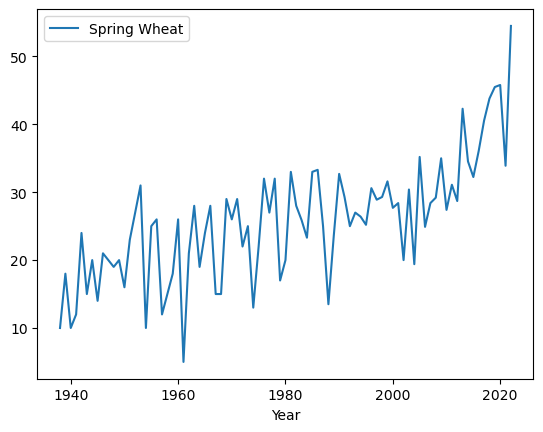

In [10]:
df.plot()

# Time Series Analysis

## AR (Autoregressive model)

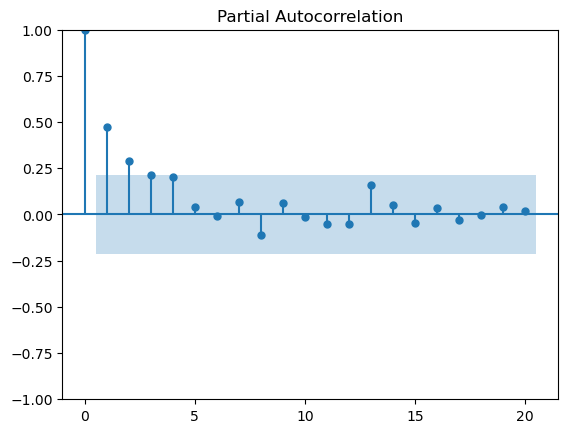

In [11]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df['Spring Wheat'], lags=None, method='ywm')
plt.show()

In [12]:
import statsmodels.api as sm

# Compute autocorrelation using Durbin-Watson test
autocorrelation = sm.stats.acorr_ljungbox(df['Spring Wheat'], lags=[1], return_df=True)

# Print the Durbin-Watson statistic and p-value
print('Durbin-Watson Statistic for lag 1: {:.2f}'.format( autocorrelation.iloc[0]['lb_stat']))
print('Durbin-Watson p-value for lag 1: {:2f}'.format(autocorrelation.iloc[0]['lb_pvalue']))

Durbin-Watson Statistic for lag 1: 19.90
Durbin-Watson p-value for lag 1: 0.000008


In [13]:
# Compute autocorrelation using Durbin-Watson test
autocorrelation = sm.stats.acorr_ljungbox(df['Spring Wheat'], lags=[2], return_df=True)

# Print the Durbin-Watson statistic and p-value
print('Durbin-Watson Statistic for lag 2: {:.2f}'.format( autocorrelation.iloc[0]['lb_stat']))
print('Durbin-Watson p-value for lag 2: {:2f}'.format(autocorrelation.iloc[0]['lb_pvalue']))

Durbin-Watson Statistic for lag 2: 37.85
Durbin-Watson p-value for lag 2: 0.000000


In [14]:
# Compute autocorrelation using Durbin-Watson test
autocorrelation = sm.stats.acorr_ljungbox(df['Spring Wheat'], lags=[3], return_df=True)

# Print the Durbin-Watson statistic and p-value
print('Durbin-Watson Statistic for lag 3: {:.2f}'.format( autocorrelation.iloc[0]['lb_stat']))
print('Durbin-Watson p-value for lag 3: {:2f}'.format(autocorrelation.iloc[0]['lb_pvalue']))

Durbin-Watson Statistic for lag 3: 55.47
Durbin-Watson p-value for lag 3: 0.000000


In [15]:
# Compute autocorrelation using Durbin-Watson test
autocorrelation = sm.stats.acorr_ljungbox(df['Spring Wheat'], lags=[4], return_df=True)

# Print the Durbin-Watson statistic and p-value
print('Durbin-Watson Statistic for lag 4: {:.2f}'.format( autocorrelation.iloc[0]['lb_stat']))
print('Durbin-Watson p-value for lag 4: {:2f}'.format(autocorrelation.iloc[0]['lb_pvalue']))

Durbin-Watson Statistic for lag 4: 74.56
Durbin-Watson p-value for lag 4: 0.000000


Durbin-Watson Statistics range from 0 to 4.
- 2 no autocorelation
- 4 negative autocorelation
- 0 positive autocreation

If P-value value is under 0.05, we can reject null hypothesis. In our case, it is 0.00. We can reject the null hyp, thus there is a strong autocorelation.

In [16]:
from statsmodels.tsa.stattools import adfuller

# Perform Dickey-Fuller test
result = adfuller(df['Spring Wheat'])

# Extract and print the test statistic and p-value
test_statistic = result[0]
p_value = result[1]
print('Dickey-Fuller Test Statistic:', test_statistic)
print('Dickey-Fuller p-value:', p_value)


Dickey-Fuller Test Statistic: 1.1883165062823586
Dickey-Fuller p-value: 0.9959041588767968


Dickey-Fuller test results shows that we can not reject the null hypothesis. So our time series is non-stationary which means it does not have a constant variance over time.

There are multiple way to make your data stationary:
- Differencing
- Transformation (z score is 1, it means it is 1 std away from the mean)
- Seasonal adjustement

In [17]:
df['Spring_Wheat_diff']=df['Spring Wheat'].diff()

In [18]:
import warnings
warnings.filterwarnings('ignore')

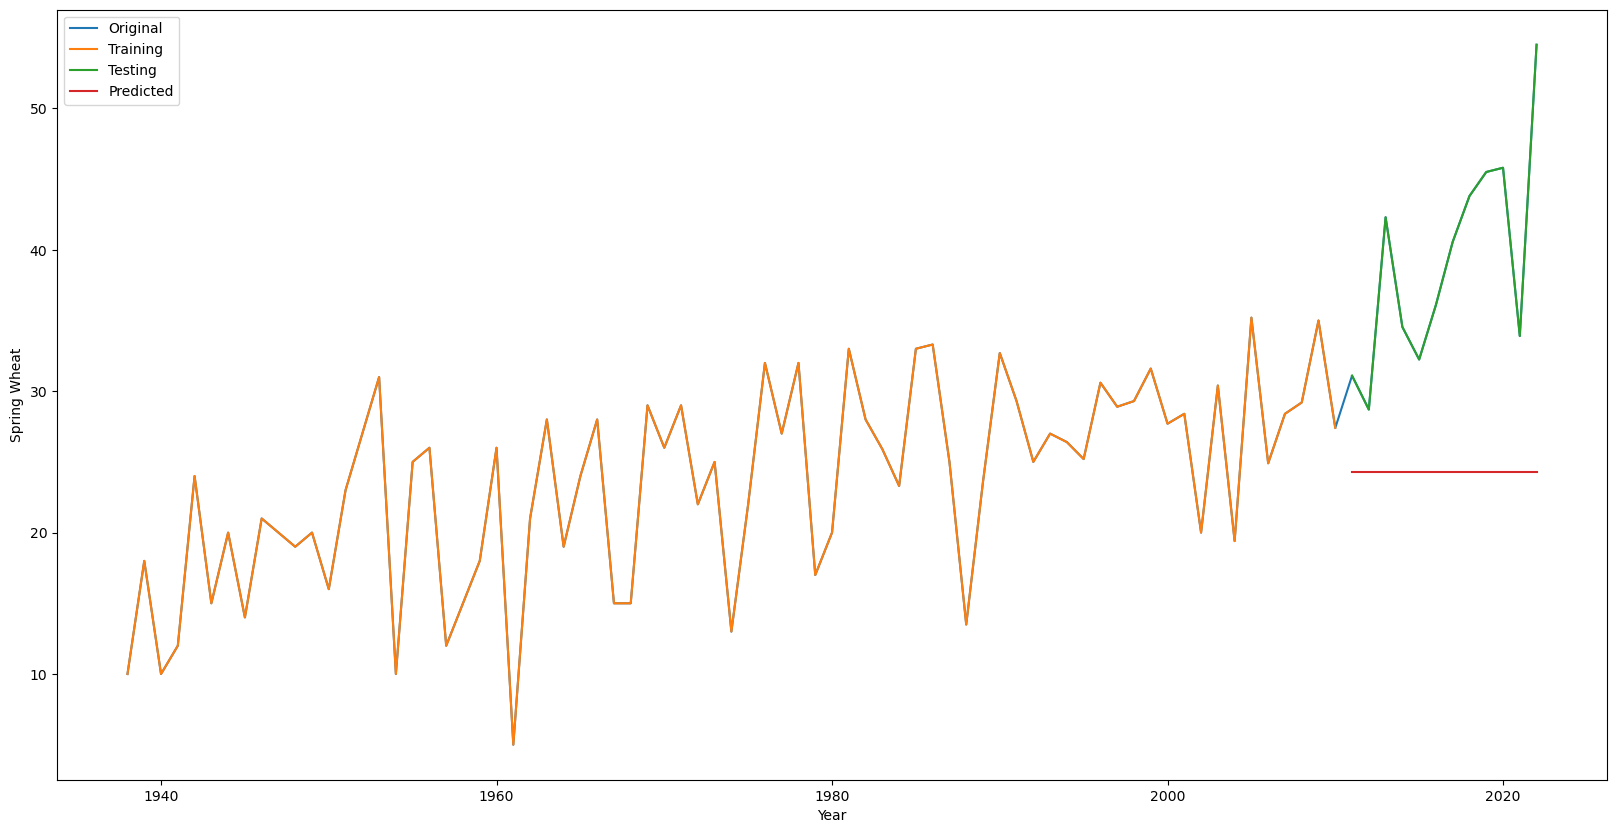

Mean Absolute Error: 14.798748548214036
Root Mean Squared Error 16.486252277240652


In [19]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

train = df.loc['1938':'2010', 'Spring Wheat']
test = df.loc['2011':'2022', 'Spring Wheat']
# Fit an AR model to the training set with an order of 1
ar_model = sm.tsa.AutoReg(train, lags=3).fit()

# Make predictions on the testing set
pred_ar = ar_model.predict(start=test.index[0], end=test.index[-1])


# Plot the original time series, the training set, and the testing set
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(df['Spring Wheat'], label='Original')
ax.plot(train, label='Training')
ax.plot(test, label='Testing')
ax.plot(pred_ar, label='Predicted')
ax.set_xlabel('Year')
ax.set_ylabel('Spring Wheat')
ax.legend()
plt.show()

# Evaluate the model's performance on the testing set
mae_ar = mean_absolute_error(test, pred_ar )
rmse_ar = mean_squared_error(test, pred_ar , squared=False)

print('Mean Absolute Error:', mae_ar)
print('Root Mean Squared Error', rmse_ar)

<Axes: >

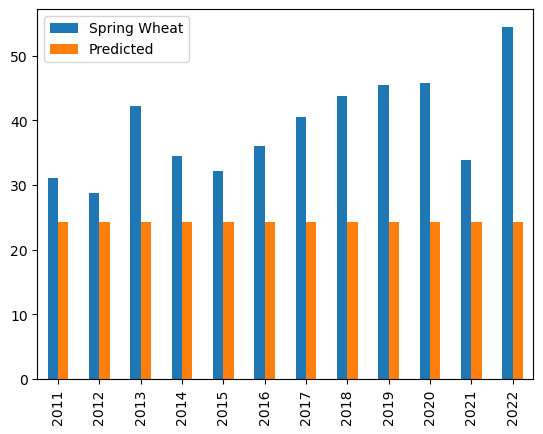

In [20]:
pd.concat([test, pred_ar], axis=1).rename(columns={0: 'Predicted'}).plot(kind='bar')

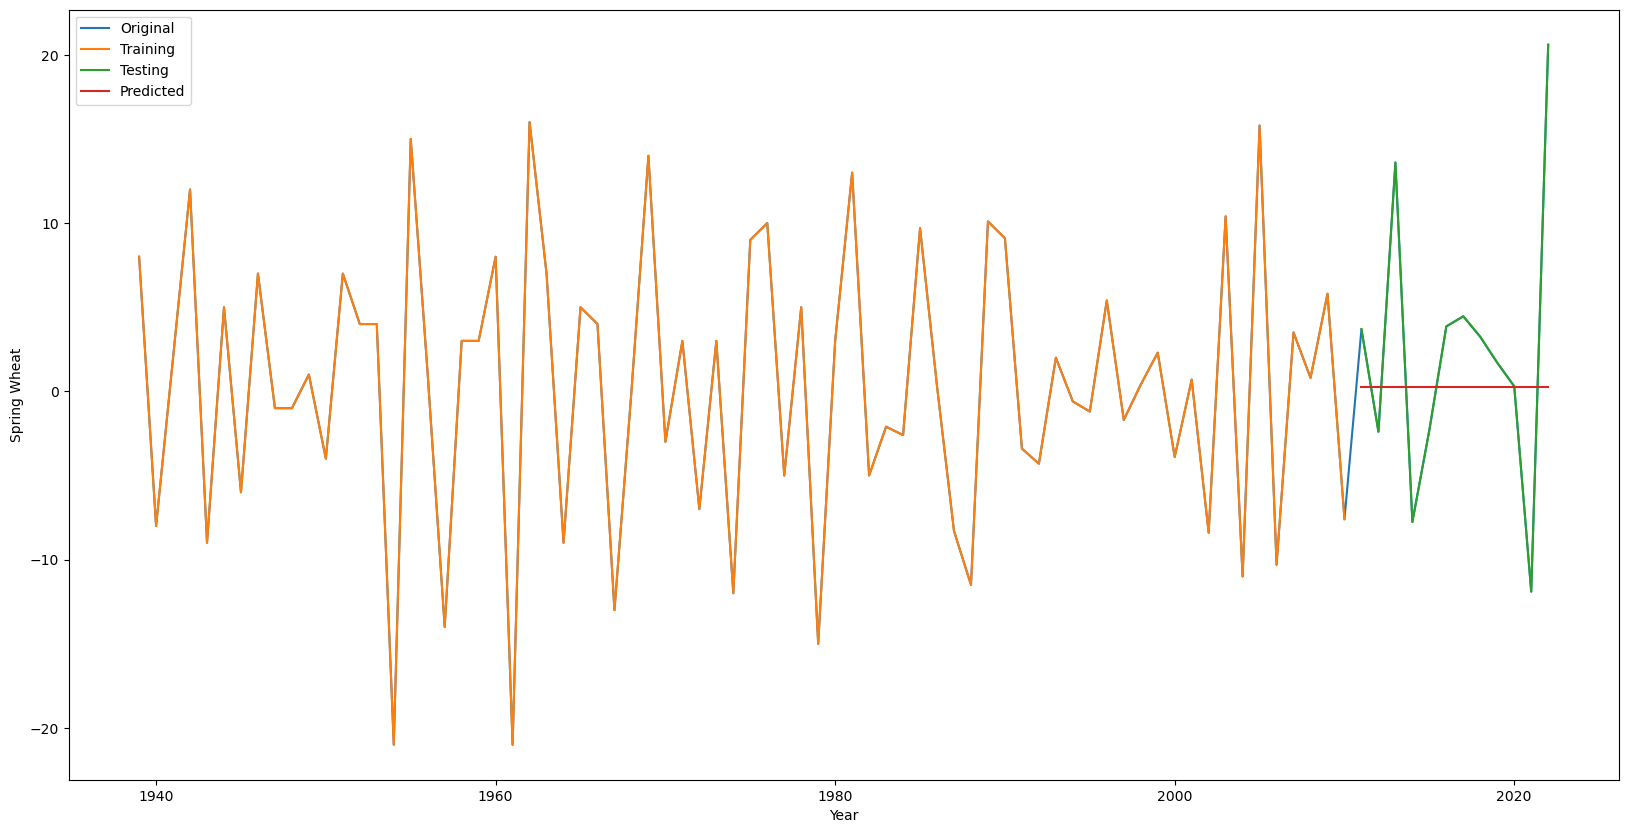

Mean Absolute Error: 6.233782446703422
Root Mean Squared Error 8.520468012851984


In [21]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

train_diff = df.loc['1938':'2010', 'Spring_Wheat_diff'].dropna()
test_diff = df.loc['2011':'2022', 'Spring_Wheat_diff']
# Fit an AR model to the training set with an order of 1
ar_model_diff = sm.tsa.AutoReg(train_diff, lags=3).fit()

# Make predictions on the testing set
pred_ar_diff = ar_model_diff.predict(start=test.index[0], end=test.index[-1])


# Plot the original time series, the training set, and the testing set
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(df['Spring_Wheat_diff'], label='Original')
ax.plot(train_diff, label='Training')
ax.plot(test_diff, label='Testing')
ax.plot(pred_ar_diff, label='Predicted')
ax.set_xlabel('Year')
ax.set_ylabel('Spring Wheat')
ax.legend()
plt.show()

# Evaluate the model's performance on the testing set
mae_diff_ar = mean_absolute_error(test_diff, pred_ar_diff )
rmse_diff_ar = mean_squared_error(test_diff, pred_ar_diff , squared=False)

print('Mean Absolute Error:', mae_diff_ar)
print('Root Mean Squared Error', rmse_diff_ar)

In [22]:
pred_ar_diff

2011    0.253653
2012    0.253653
2013    0.253653
2014    0.253653
2015    0.253653
2016    0.253653
2017    0.253653
2018    0.253653
2019    0.253653
2020    0.253653
2021    0.253653
2022    0.253653
dtype: float64

## ARIMA (Autoregressive Integrated Moving Average)

ARIMA(p,d,q) is a popular and widely used model for time series forecasting and analysis. Three main comonnts:
- Autoregressive (p) - corelation current time value and historical lagged values
- Integrated (d) - differencing values to make it stationary
- Moving Average (q) - The moving average component represents the relationship between an observation in the time series and the residual errors from a moving average model applied to lagged observations. It captures random noise and shocks in data

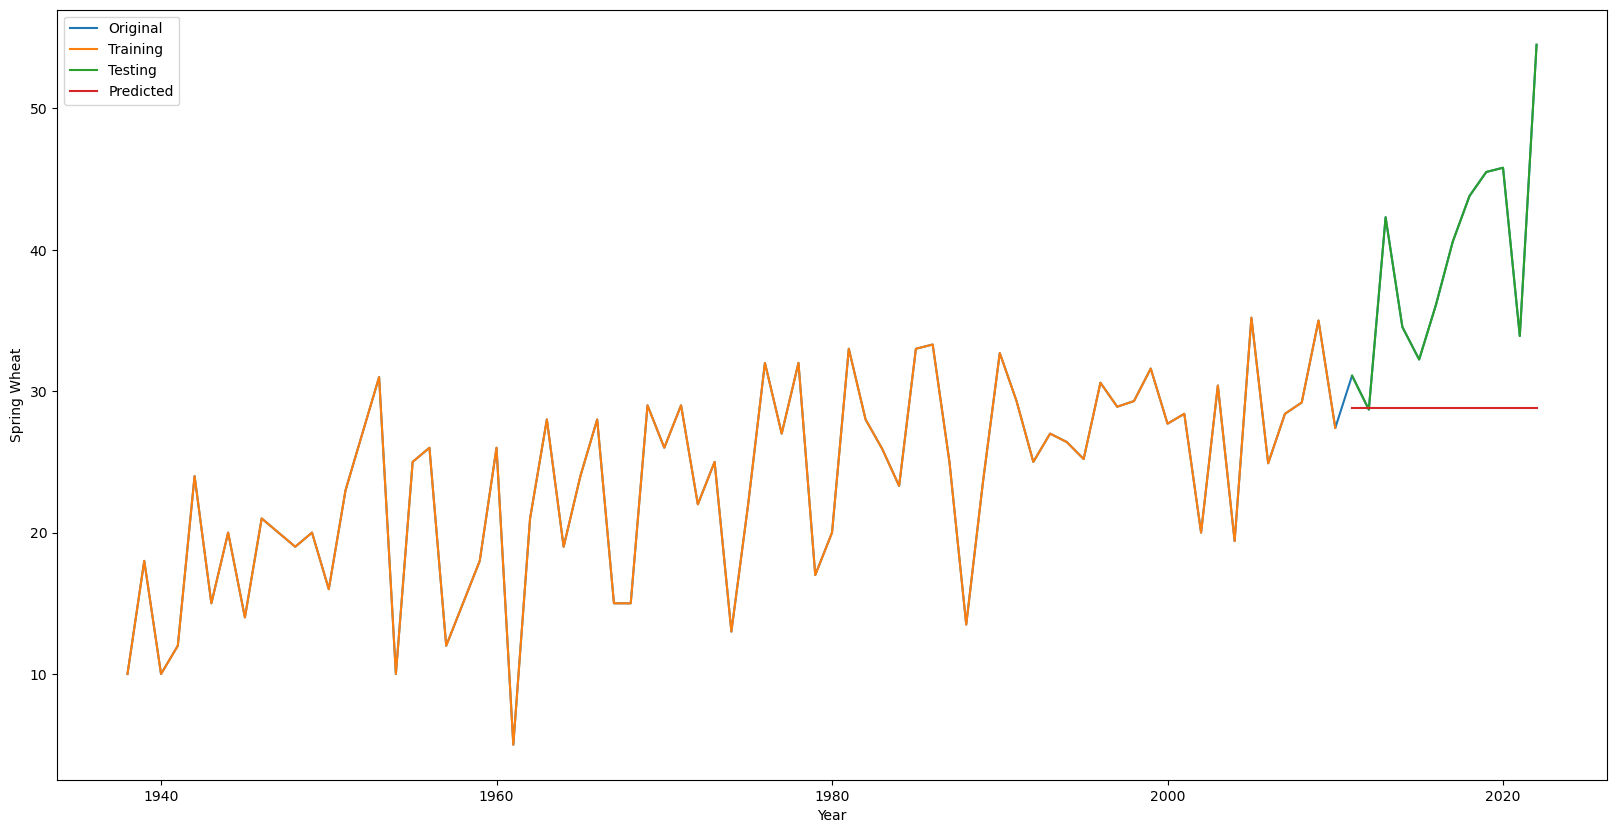

Mean Absolute Error: 10.323287303380509
Root Mean Squared Error 12.613574577847354


In [23]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Fit the ARIMA model
model_arima = ARIMA(train, order=(3, 1, 2))
model_fit = model_arima.fit()

# Make predictions
pred_arima = model_fit.predict(start=test.index[0], end=test.index[-1])

# Plot the original time series, the training set, and the testing set
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(df['Spring Wheat'], label='Original')
ax.plot(train, label='Training')
ax.plot(test, label='Testing')
ax.plot(pred_arima, label='Predicted')
ax.set_xlabel('Year')
ax.set_ylabel('Spring Wheat')
ax.legend()
plt.show()

# Evaluate the model's performance on the testing set
mae_arima = mean_absolute_error(test, pred_arima )
rmse_arima = mean_squared_error(test, pred_arima , squared=False)

print('Mean Absolute Error:', mae_arima)
print('Root Mean Squared Error', rmse_arima)

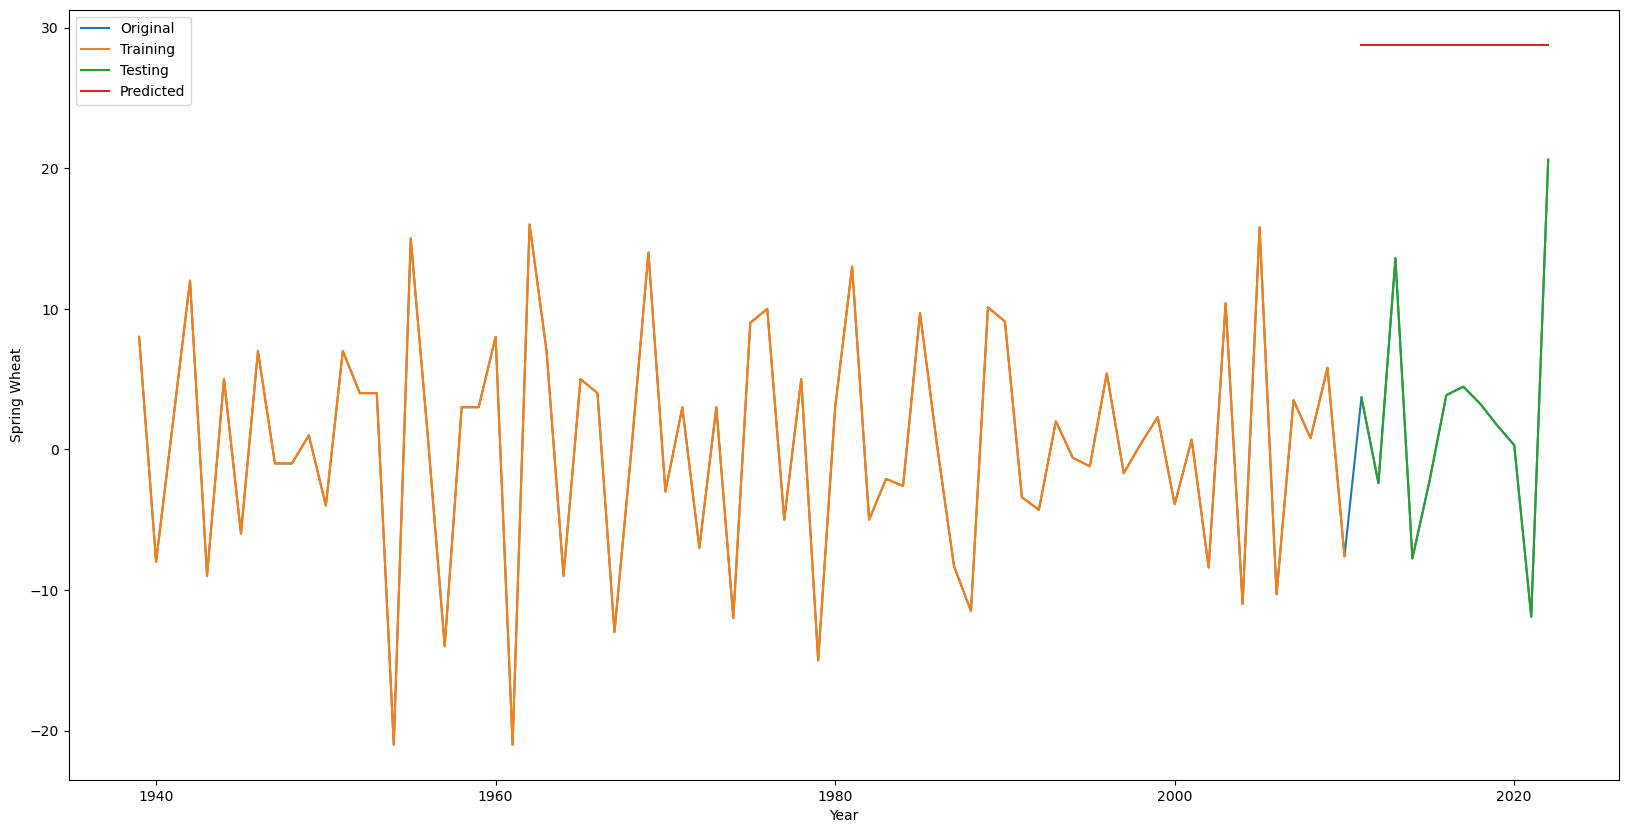

Mean Absolute Error: 10.323287303380509
Root Mean Squared Error 12.613574577847354


In [24]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Fit the ARIMA model
model_arima_diff = ARIMA(train_diff, order=(3, 0, 2))
model_fit_diff = model_arima.fit()

# Make predictions
pred_arima_diff = model_fit.predict(start=test_diff.index[0], end=test_diff.index[-1])

# Plot the original time series, the training set, and the testing set
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(df['Spring_Wheat_diff'], label='Original')
ax.plot(train_diff, label='Training')
ax.plot(test_diff, label='Testing')
ax.plot(pred_arima, label='Predicted')
ax.set_xlabel('Year')
ax.set_ylabel('Spring Wheat')
ax.legend()
plt.show()

# Evaluate the model's performance on the testing set
mae_arima_diff = mean_absolute_error(test, pred_arima_diff )
rmse_arima_diff = mean_squared_error(test, pred_arima_diff , squared=False)

print('Mean Absolute Error:', mae_arima_diff)
print('Root Mean Squared Error', rmse_arima_diff)

## XGBoost Time Series

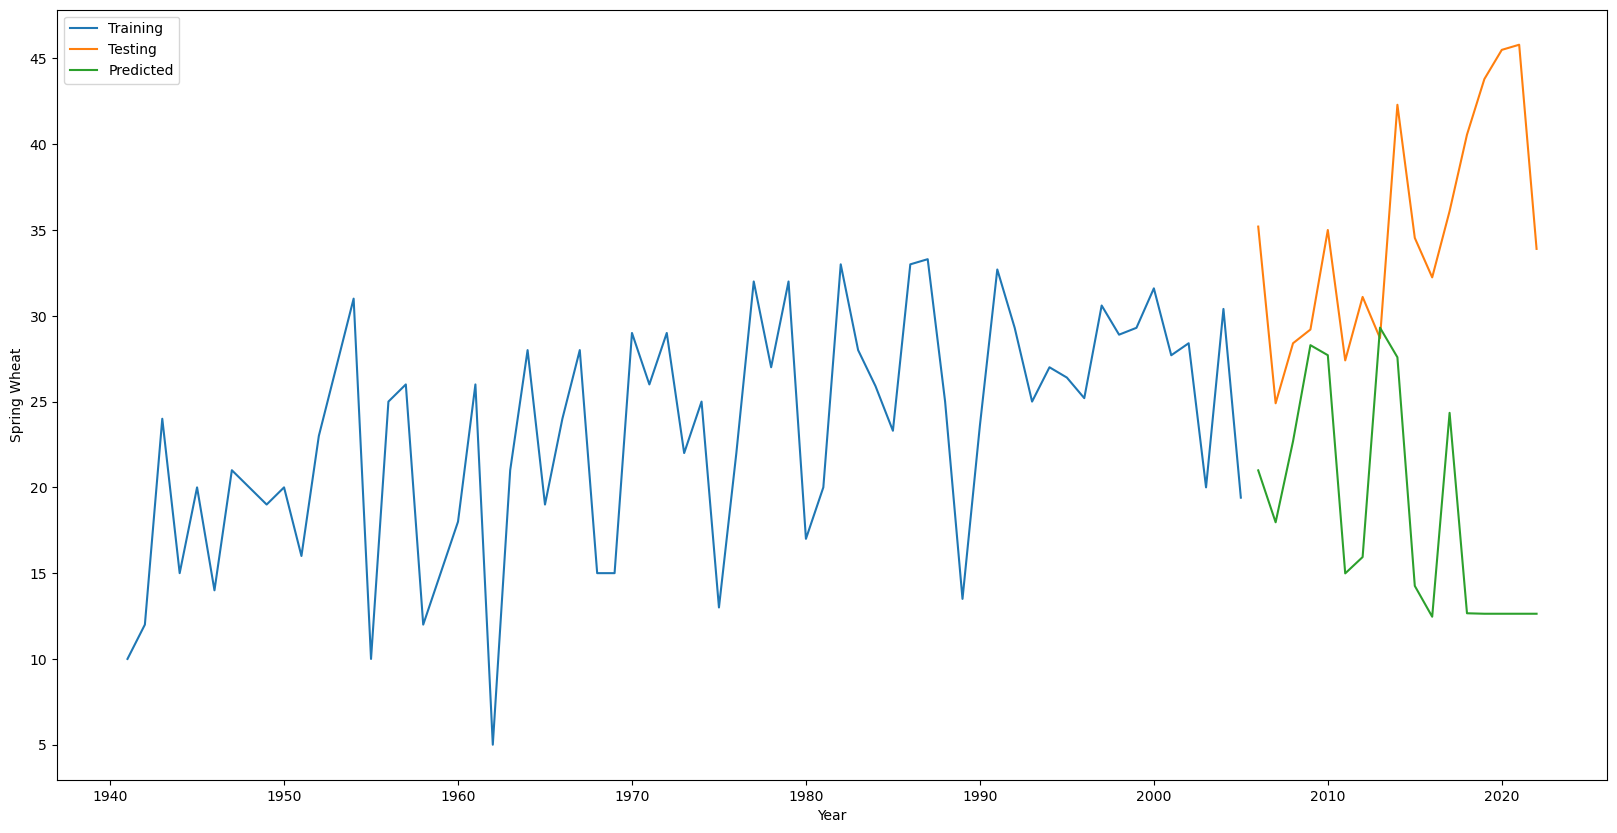

MAE: 17.343518068650187
RMSE: 20.795026054584486


In [25]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Step 1: Prepare the data
# Create lagged features of the target variable
df['lag1'] = df['Spring Wheat'].shift(1)
df['lag2'] = df['Spring Wheat'].shift(2)
df['lag3'] = df['Spring Wheat'].shift(3)
df.dropna(inplace=True)

# Step 2: Split the data
train_size = int(len(df) * 0.8)  # 80% for training
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Separate features and target variables
train_features = train_data[['lag1', 'lag2', 'lag3']]
train_target = train_data['Spring Wheat']
test_features = test_data[['lag1', 'lag2', 'lag3']]
test_target = test_data['Spring Wheat']

# Step 3: Define the XGBoost model
model_xgb = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.1, max_depth=5) # grid search

# Step 4: Train the model
model_xgb.fit(train_features, train_target)

# Step 5: Make predictions
pred_xgb = model_xgb.predict(test_features)
pred_xgb = pd.Series(pred_xgb, index=test_features.index)

# Step 6: Evaluate the model
mae_xgb = mean_absolute_error(test_target, pred_xgb)
rmse_xgb = sqrt(mean_squared_error(test_target, pred_xgb))

# Plot the original time series, the training set, and the testing set
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(train_features['lag1'], label='Training')
ax.plot(test_features['lag1'], label='Testing')
ax.plot(pred_xgb, label='Predicted')
ax.set_xlabel('Year')
ax.set_ylabel('Spring Wheat')
ax.legend()
plt.show()
print("MAE:", mae_xgb)
print("RMSE:", rmse_xgb)


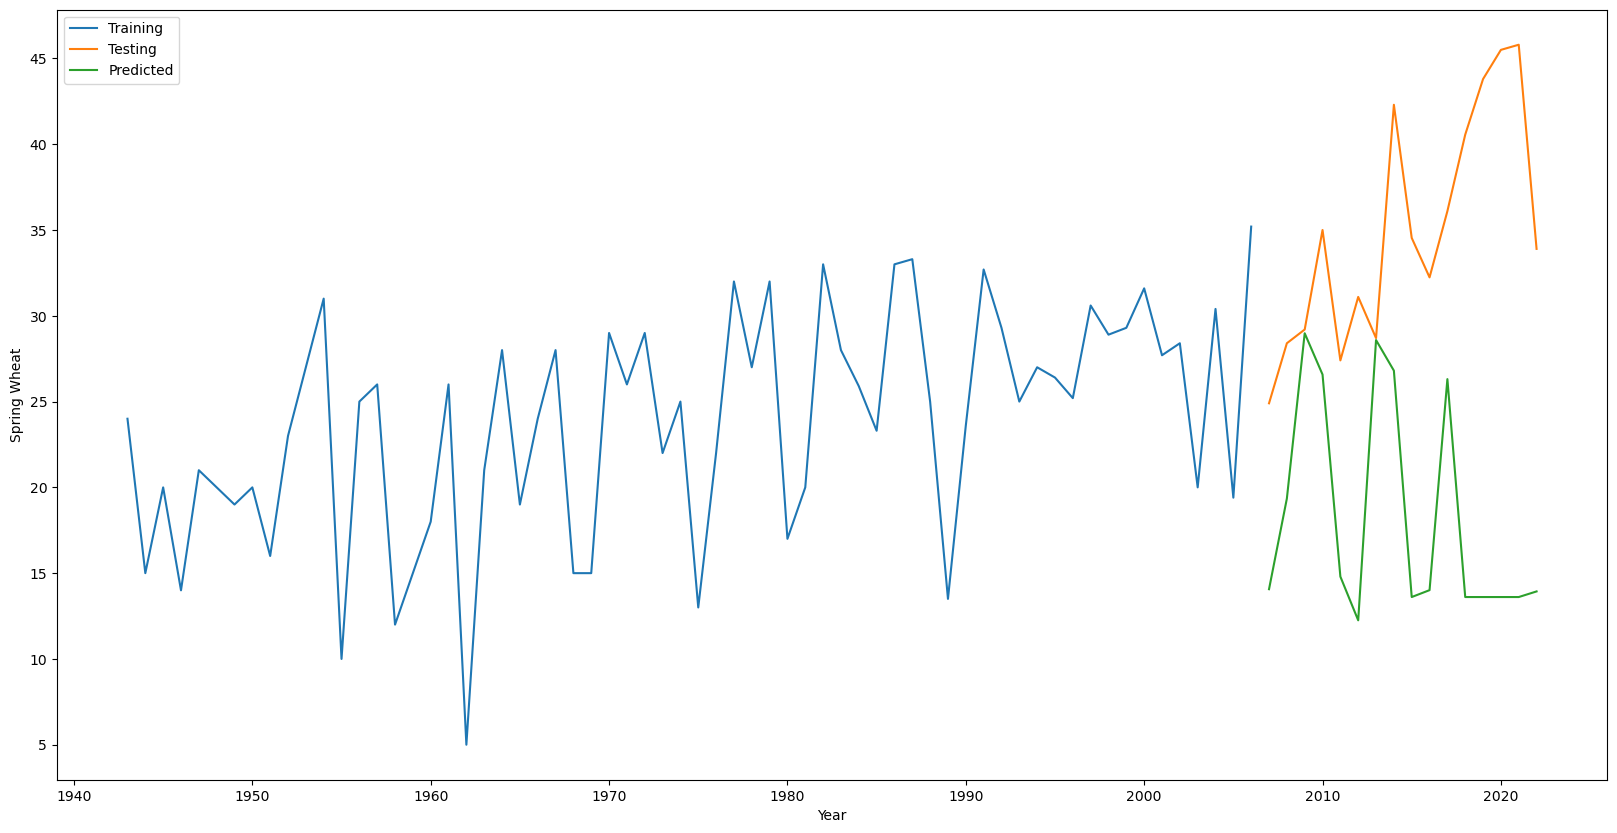

MAE: 18.45864296197891
RMSE: 21.189968631777123


In [26]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Step 1: Prepare the data
# Create lagged features of the target variable
df['lag1'] = df['Spring Wheat'].shift(1)
df['lag2'] = df['Spring Wheat'].shift(2)
df.dropna(inplace=True)

# Step 2: Split the data
train_size = int(len(df) * 0.8)  # 80% for training
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Separate features and target variables
train_features = train_data[['lag1', 'lag2']]
train_target = train_data['Spring Wheat']
test_features = test_data[['lag1', 'lag2']]
test_target = test_data['Spring Wheat']

# Step 3: Define the XGBoost model
model_xgb = xgb.XGBRegressor(n_estimators=50, learning_rate=0.1, max_depth=5)

# Step 4: Train the model
model_xgb.fit(train_features, train_target)

# Step 5: Make predictions
pred_xgb = model_xgb.predict(test_features)
pred_xgb = pd.Series(pred_xgb, index=test_features.index)

# Step 6: Evaluate the model
mae_xgb = mean_absolute_error(test_target, pred_xgb)
rmse_xgb = sqrt(mean_squared_error(test_target, pred_xgb))

# Plot the original time series, the training set, and the testing set
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(train_features['lag1'], label='Training')
ax.plot(test_features['lag1'], label='Testing')
ax.plot(pred_xgb, label='Predicted')
ax.set_xlabel('Year')
ax.set_ylabel('Spring Wheat')
ax.legend()
plt.show()
print("MAE:", mae_xgb)
print("RMSE:", rmse_xgb)